# Introduction to MulensModel

How to create and plot a model and then add some data and fit for the source and blend fluxes.

This example shows OGLE-2003-BLG-235/MOA-2003-BLG-53, the first microlensing planet. See [Bond et al. 2004](http://adsabs.harvard.edu/abs/2004ApJ...606L.155B). The data were downloaded from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/DisplayOverview/nph-DisplayOverview?objname=OGLE-2003-BLG-235L+b&type=CONFIRMED_PLANET).

In [1]:
# Import basic packages
import MulensModel
import matplotlib.pyplot as plt # MulensModel uses matplotlib for plotting.
import os.path

In [3]:
# Define a point lens model:
my_pspl_model = MulensModel.Model(
    {'t_0': 2452848.06, 'u_0': 0.133, 't_E': 61.5})

# Or a model with 2-bodies:
my_1S2L_model = MulensModel.Model(
    {'t_0': 2452848.06, 'u_0': 0.133, 't_E': 61.5, 'rho': 0.00096, 
     'q': 0.0039, 's': 1.120, 'alpha': 223.8})
# Since rho is set, define a time range and method to apply 
# finite source effects:
my_1S2L_model.set_magnification_methods(
    [2452833., 'VBBL', 2452845.])

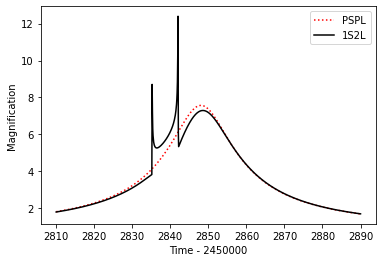

In [4]:
# Plot those models:
my_pspl_model.plot_magnification(
    t_range=[2452810, 2452890], subtract_2450000=True, color='red', 
    linestyle=':', label='PSPL')
my_1S2L_model.plot_magnification(
    t_range=[2452810, 2452890], subtract_2450000=True, color='black', 
    label='1S2L')
plt.legend(loc='best')
plt.show()

In [7]:
# Suppose you also had some data you want to import:

OGLE_data = MulensModel.MulensData(
    file_name=os.path.join(
        MulensModel.DATA_PATH, "photometry_files", "OB03235", "OB03235_OGLE.tbl.txt"),
    comments=['\\','|'], plot_properties={'label': 'OGLE', 'color': 'orange'})

MOA_data = MulensModel.MulensData(
    file_name=os.path.join(
        MulensModel.DATA_PATH, "photometry_files", "OB03235", "OB03235_MOA.tbl.txt"),
        phot_fmt='flux', comments=['\\','|'], plot_properties={'label': 'MOA', 'color': 'cyan'})

/Users/jyee/MulensModel/source/MulensModel/utils.py:149: UserWarning: Flux to magnitude conversion approached negative flux
  UserWarning)
/Users/jyee/MulensModel/source/MulensModel/utils.py:150: RuntimeWarning: invalid value encountered in log10
  mag = zeropoint - 2.5 * np.log10(flux)


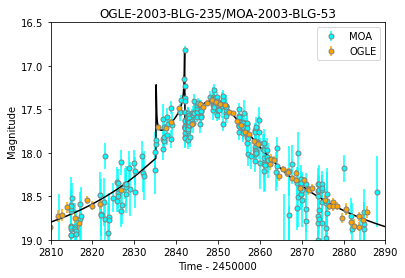

In [8]:
# Now suppose you wanted to combine the two together:
my_event = MulensModel.Event(
    datasets=[MOA_data, OGLE_data], model=my_1S2L_model)

# And you wanted to plot the result:
my_event.plot_model(
    t_range=[2452810,2452890], subtract_2450000=True, color='black',
    data_ref=1)
my_event.plot_data(
    subtract_2450000=True, data_ref=1, s=5, markeredgecolor='gray')
# MulensModel automatically fits for the source and blend flux for the  
# given model.

# Customize the output
plt.legend(loc='best')
plt.title('OGLE-2003-BLG-235/MOA-2003-BLG-53')
plt.ylim(19., 16.5)
plt.xlim(2810,2890)
plt.show()

In [9]:
# If you want to see how good the fit is, output the chi2:
print('Chi2 of the fit: {0:8.2f}'.format(my_event.get_chi2()))

Chi2 of the fit:  1774.42


If you want to optimize the chi2, we leave it up to you to determine the best method for doing this.